In [1]:
# Import required packages for this project.
from pathlib import Path

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd
from pandas.plotting import scatter_matrix, parallel_coordinates

import seaborn as sns

from sklearn import preprocessing
from scipy.stats import anderson
from scipy.stats import ttest_ind


import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as smf
from statsmodels.graphics.gofplots import qqplot

%matplotlib inline


In [2]:
# Established path to access data for this project.
DATA = Path("C:\\Users\\rcc_0\\OneDrive\\Documents\\ANA 620\\Assignment_1")

In [3]:
# Load the required data for this project.
Cars_df = pd.read_csv(DATA / 'HW1_Cars.csv')

# View some initial records.
Cars_df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


In [4]:
# Generate data frame dimensions.
Cars_df.shape

(428, 15)

In [5]:
# Generate variable data types.
Cars_df.dtypes

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower       int64
MPG_City         int64
MPG_Highway      int64
Weight           int64
Wheelbase        int64
Length           int64
dtype: object

In [6]:
# Generate number of missing values.
Cars_df.isna().sum()

Make           0
Model          0
Type           0
Origin         0
DriveTrain     0
MSRP           0
Invoice        0
EngineSize     0
Cylinders      2
Horsepower     0
MPG_City       0
MPG_Highway    0
Weight         0
Wheelbase      0
Length         0
dtype: int64

Specific Evaluation and Preparation of Dataset Variables

In [7]:
# Evaluate the 'Make' categorical variable.
Cars_df['Make'].describe()

count        428
unique        38
top       Toyota
freq          28
Name: Make, dtype: object

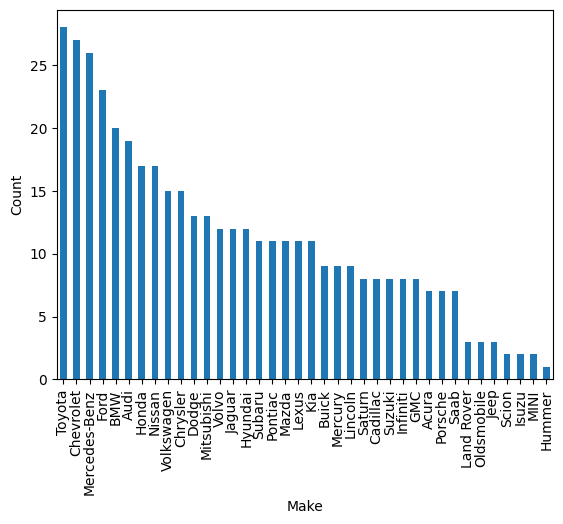

In [8]:
# Barchart for the 'Make' categorical variable.
Cars_df['Make'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [9]:
# Evaluate the 'Model' categorical variable.
Cars_df['Model'].describe()

count          428
unique         425
top        G35 4dr
freq             2
Name: Model, dtype: object

In [10]:
# Evaluate the 'Type' categorical variable.
Cars_df['Type'].describe()

count       428
unique        6
top       Sedan
freq        262
Name: Type, dtype: object

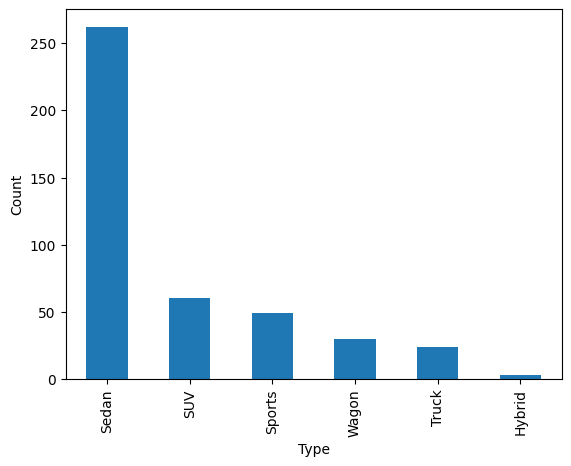

In [11]:
# Barchart for the 'Type' categorical variable.
Cars_df['Type'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [12]:
# Evaluate the 'Origin' categorical variable.
Cars_df['Origin'].describe()

count      428
unique       3
top       Asia
freq       158
Name: Origin, dtype: object

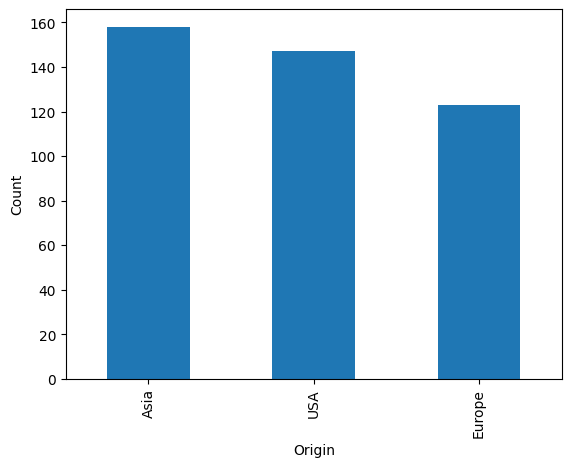

In [13]:
# Barchart for the 'Origin' categorical variable.
Cars_df['Origin'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [14]:
# Evaluate the 'DriveTrain' categorical variable.
Cars_df['DriveTrain'].describe()

count       428
unique        3
top       Front
freq        226
Name: DriveTrain, dtype: object

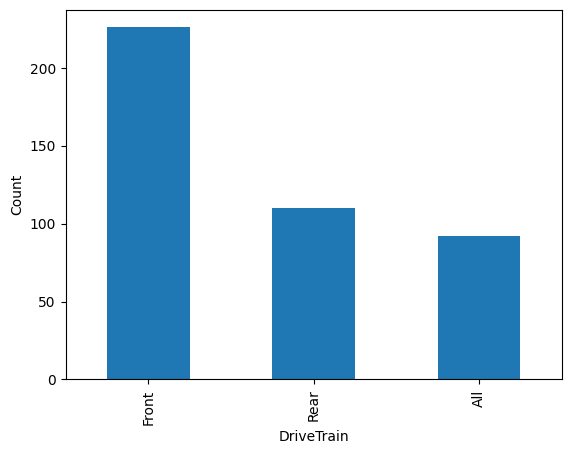

In [15]:
# Barchart for the 'DriveTrain' categorical variable.
Cars_df['DriveTrain'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

In [16]:
# Convert the 'MSRP' variable from an object to a float.
Cars_df['MSRP'] = Cars_df['MSRP'].replace('[$,]','',regex=True).astype(float)

In [17]:
# Convert the 'Invoice' variable from an object to a float.
Cars_df['Invoice'] = Cars_df['Invoice'].replace('[$,]','',regex=True).astype(float)

In [18]:
Cars_df.describe()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000000,428.000000,428.000000,426.000000,428.000000,428.000000,428.000000,428.000000,428.000000,428.000000
mean,32774.855140,30014.700935,3.196729,5.807512,215.885514,20.060748,26.843458,3577.953271,108.154206,186.362150
std,19431.716674,17642.117750,1.108595,1.558443,71.836032,5.238218,5.741201,758.983215,8.311813,14.357991
min,10280.000000,9875.000000,1.300000,3.000000,73.000000,10.000000,12.000000,1850.000000,89.000000,143.000000
25%,20334.250000,18866.000000,2.375000,4.000000,165.000000,17.000000,24.000000,3104.000000,103.000000,178.000000
50%,27635.000000,25294.500000,3.000000,6.000000,210.000000,19.000000,26.000000,3474.500000,107.000000,187.000000
75%,39205.000000,35710.250000,3.900000,6.000000,255.000000,21.250000,29.000000,3977.750000,112.000000,194.000000
max,192465.000000,173560.000000,8.300000,12.000000,500.000000,60.000000,66.000000,7190.000000,144.000000,238.000000


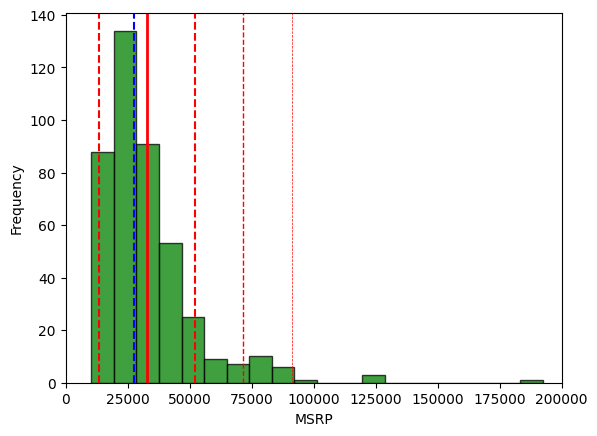

In [19]:
# Histogram for the 'MSRP' numerical variable.
plt.hist(Cars_df['MSRP'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('MSRP')
plt.ylabel('Frequency')
plt.xlim(0, 200000)

mean_value = Cars_df['MSRP'].mean()
median_value = Cars_df['MSRP'].median()
std_value = Cars_df['MSRP'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

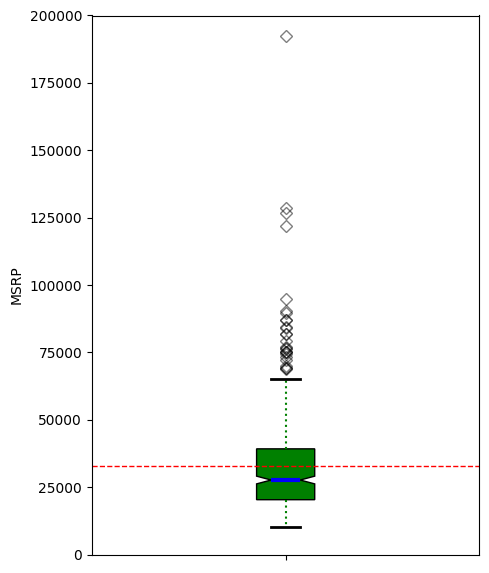

In [20]:
# Boxplot for the 'MSRP' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Cars_df['MSRP'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('MSRP')  
ax.set_xticklabels('')

# Set axis limits.
ax.set_ylim(0,200000) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [21]:
# 'MSRP' Anderson-Darling Normality Test
result = anderson(Cars_df['MSRP'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 19.845
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


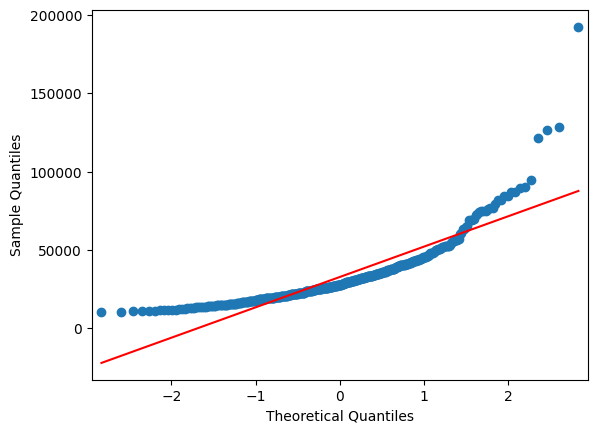

In [22]:
# 'MSRP' QQ plot
qqplot(Cars_df['MSRP'], line='s')
plt.show()

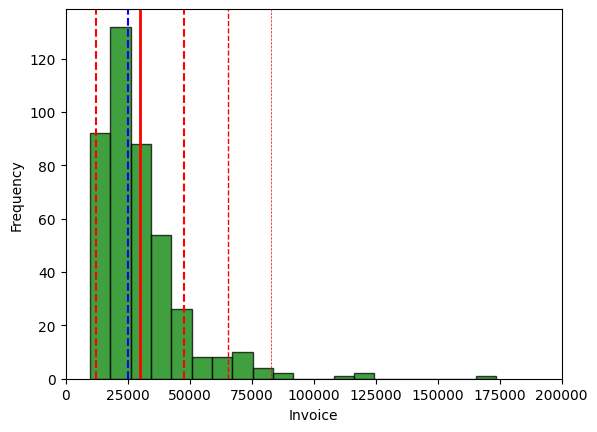

In [23]:
# Histogram for the 'Invoice' numerical variable.
plt.hist(Cars_df['Invoice'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Invoice')
plt.ylabel('Frequency')
plt.xlim(0, 200000)

mean_value = Cars_df['Invoice'].mean()
median_value = Cars_df['Invoice'].median()
std_value = Cars_df['Invoice'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

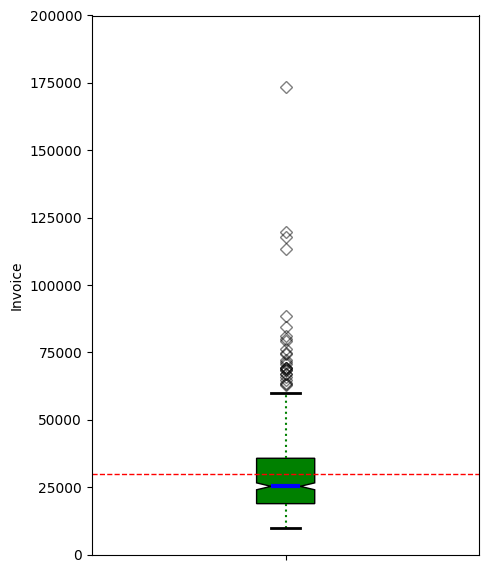

In [24]:
# Boxplot for the 'Invoice' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance
bp = ax.boxplot(Cars_df['Invoice'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Invoice')  
ax.set_xticklabels('')  

# Set axis limits.
ax.set_ylim(0,200000) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [25]:
# 'Invoice' Anderson-Darling Normality Test
result = anderson(Cars_df['Invoice'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 20.395
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


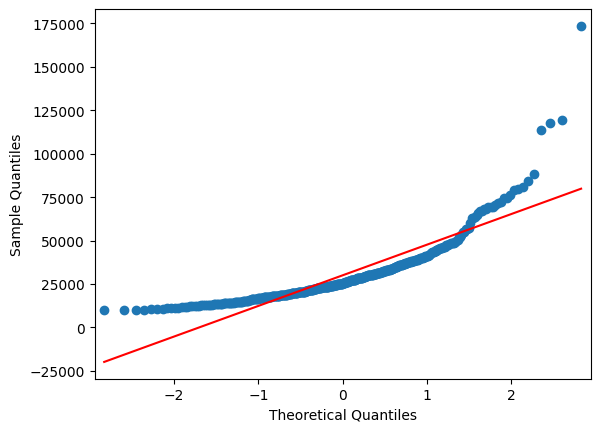

In [26]:
# 'Invoice' QQ plot
qqplot(Cars_df['Invoice'], line='s')
plt.show()

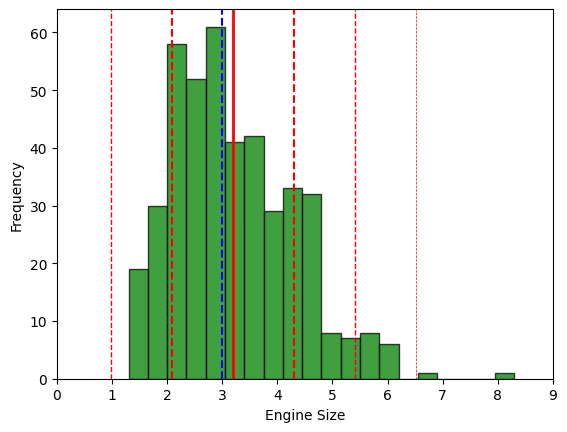

In [27]:
# Histogram for the 'EngineSize' numerical variable.
plt.hist(Cars_df['EngineSize'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Engine Size')
plt.ylabel('Frequency')
plt.xlim(0, 9)

mean_value = Cars_df['EngineSize'].mean()
median_value = Cars_df['EngineSize'].median()
std_value = Cars_df['EngineSize'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

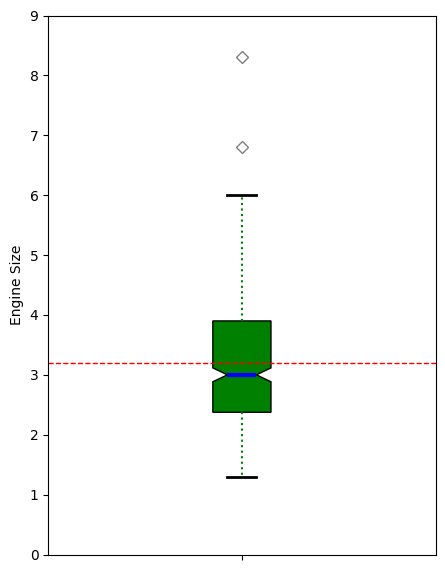

In [28]:
# Boxplot for the 'EngineSize' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['EngineSize'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Engine Size')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(0,9) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [29]:
# 'EngineSize' Anderson-Darling Normality Test
result = anderson(Cars_df['EngineSize'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.997
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


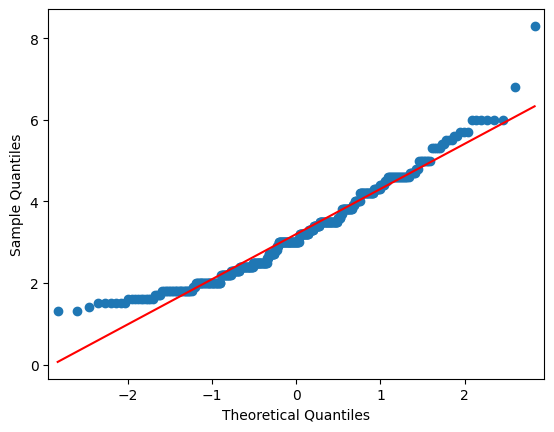

In [30]:
# 'EngineSize' QQ plot
qqplot(Cars_df['EngineSize'], line='s')
plt.show()

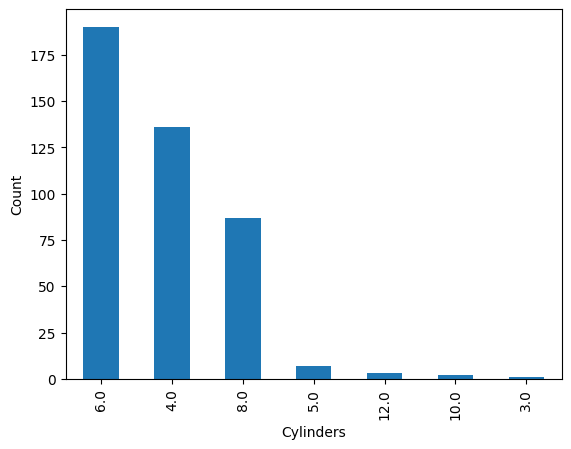

In [31]:
# Barchart for the 'Cylinders' numeric variable.
Cars_df['Cylinders'].value_counts().plot(kind='bar')
plt.ylabel('Count')
plt.show()

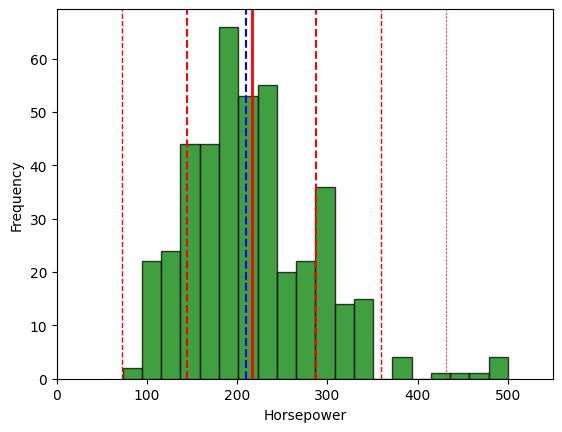

In [32]:
# Histogram for the 'Horsepower' numerical variable.
plt.hist(Cars_df['Horsepower'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
plt.xlim(0, 550)

mean_value = Cars_df['Horsepower'].mean()
median_value = Cars_df['Horsepower'].median()
std_value = Cars_df['Horsepower'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

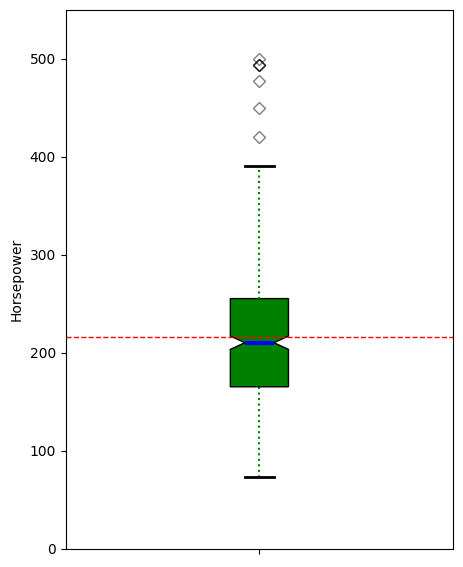

In [33]:
# Boxplot for the 'Horsepower' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['Horsepower'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Horsepower')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(0,550) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [34]:
# 'Horsepower' Anderson-Darling Normality Test
result = anderson(Cars_df['Horsepower'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.686
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


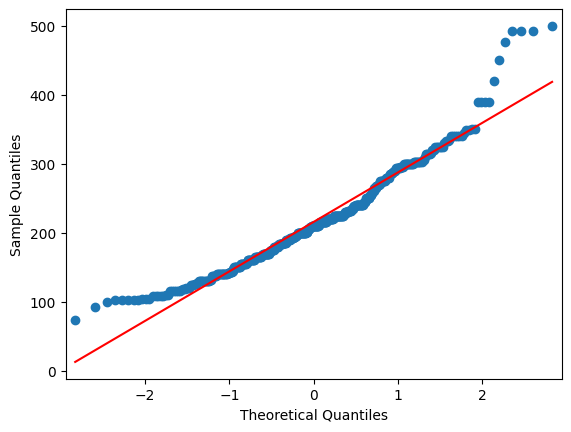

In [35]:
# 'Horsepower' QQ plot
qqplot(Cars_df['Horsepower'], line='s')
plt.show()

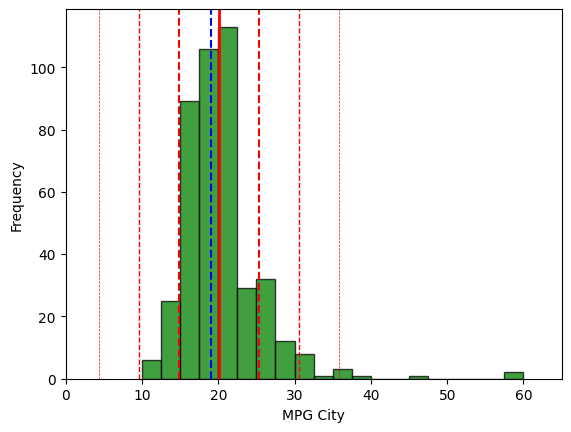

In [36]:
# Histogram for the 'MPG_City' numerical variable.
plt.hist(Cars_df['MPG_City'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('MPG City')
plt.ylabel('Frequency')
plt.xlim(0, 65)

mean_value = Cars_df['MPG_City'].mean()
median_value = Cars_df['MPG_City'].median()
std_value = Cars_df['MPG_City'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

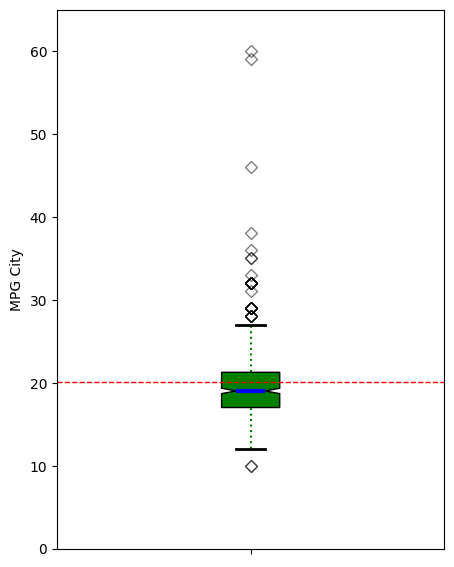

In [37]:
# Boxplot for the 'MPG_City' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['MPG_City'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('MPG City')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(0,65) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [38]:
# 'MPG_City' Anderson-Darling Normality Test
result = anderson(Cars_df['MPG_City'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 14.673
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


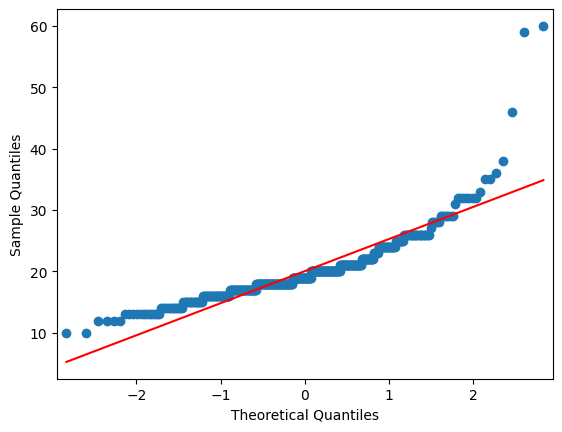

In [39]:
# 'MPG_City' QQ plot
qqplot(Cars_df['MPG_City'], line='s')
plt.show()

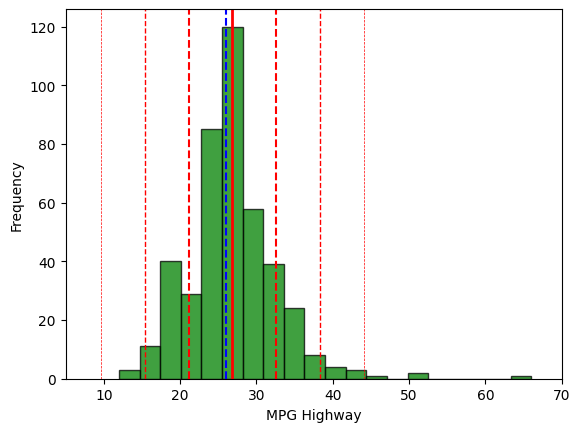

In [40]:
# Histogram for the 'MPG_Highway' numerical variable.
plt.hist(Cars_df['MPG_Highway'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('MPG Highway')
plt.ylabel('Frequency')
plt.xlim(5, 70)

mean_value = Cars_df['MPG_Highway'].mean()
median_value = Cars_df['MPG_Highway'].median()
std_value = Cars_df['MPG_Highway'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

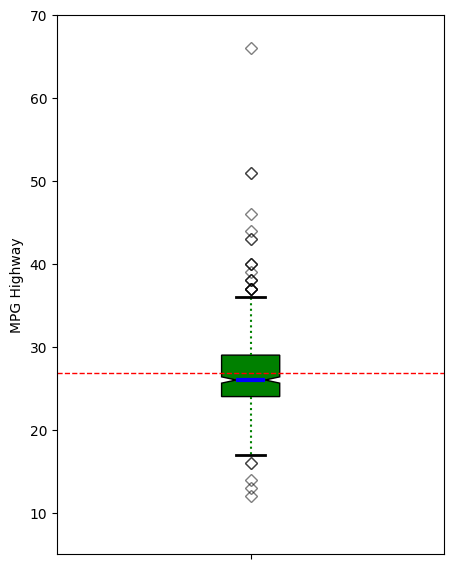

In [41]:
# Boxplot for the 'MPG_Highway' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['MPG_Highway'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('MPG Highway')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(5,70) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [42]:
# 'MPG_Highway' Anderson-Darling Normality Test
result = anderson(Cars_df['MPG_Highway'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4.589
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


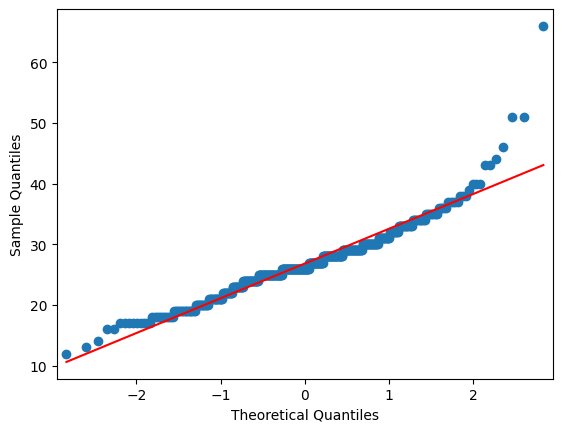

In [43]:
# 'MPG_Highway' QQ plot
qqplot(Cars_df['MPG_Highway'], line='s')
plt.show()

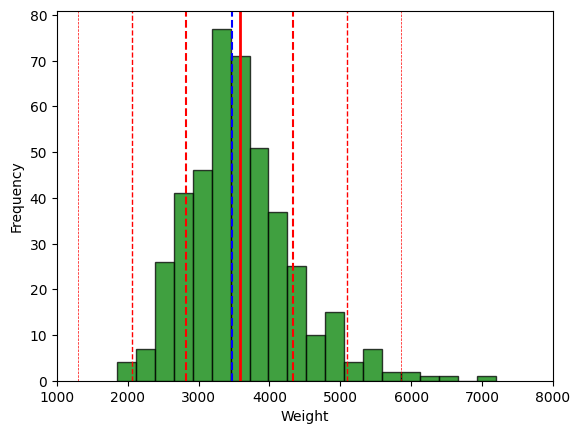

In [44]:
# Histogram for the 'Weight' numerical variable.
plt.hist(Cars_df['Weight'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Weight')
plt.ylabel('Frequency')
plt.xlim(1000, 8000)

mean_value = Cars_df['Weight'].mean()
median_value = Cars_df['Weight'].median()
std_value = Cars_df['Weight'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

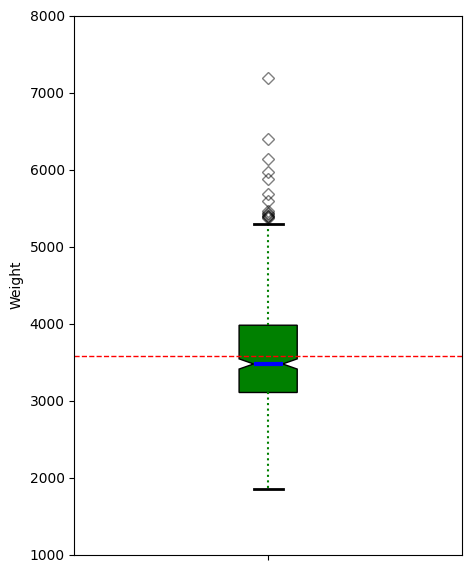

In [45]:
# Boxplot for the 'Weight' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['Weight'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Weight')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(1000,8000) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [46]:
# 'Weight' Anderson-Darling Normality Test
result = anderson(Cars_df['Weight'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 3.804
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


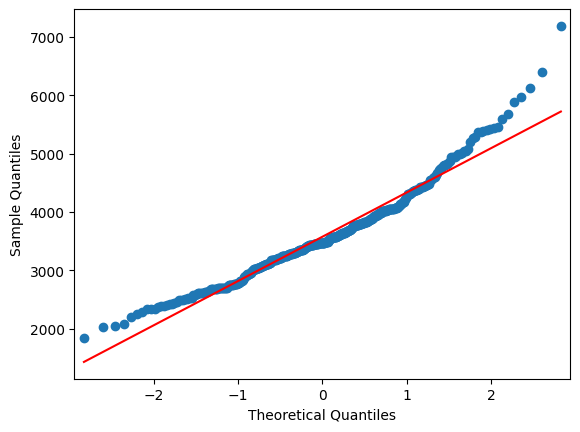

In [47]:
# 'Weight' QQ plot
qqplot(Cars_df['Weight'], line='s')
plt.show()

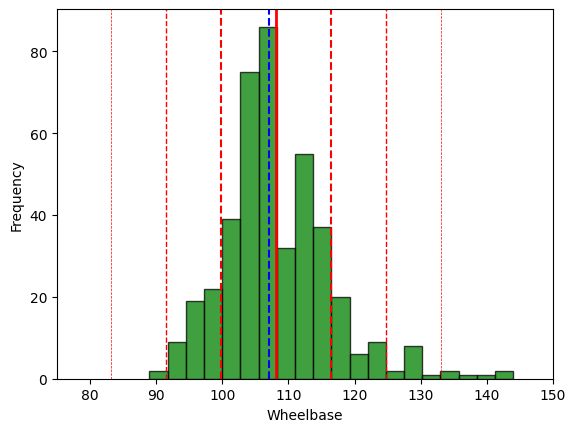

In [48]:
# Histogram for the 'Wheelbase' numerical variable.
plt.hist(Cars_df['Wheelbase'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Wheelbase')
plt.ylabel('Frequency')
plt.xlim(75, 150)

mean_value = Cars_df['Wheelbase'].mean()
median_value = Cars_df['Wheelbase'].median()
std_value = Cars_df['Wheelbase'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

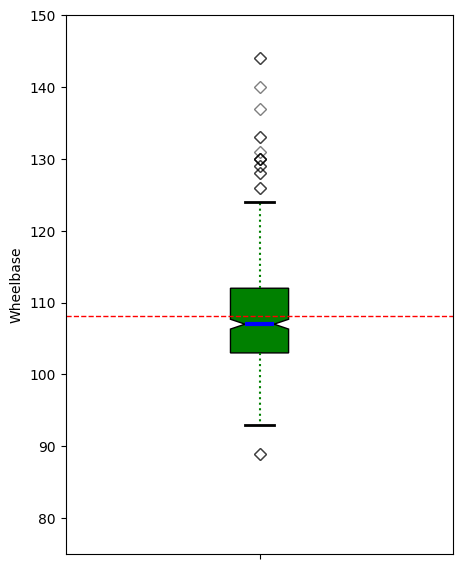

In [49]:
# Boxplot for the 'Wheelbase' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['Wheelbase'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Wheelbase')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(75,150) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [50]:
# 'Wheelbase' Anderson-Darling Normality Test
result = anderson(Cars_df['Wheelbase'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 4.749
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


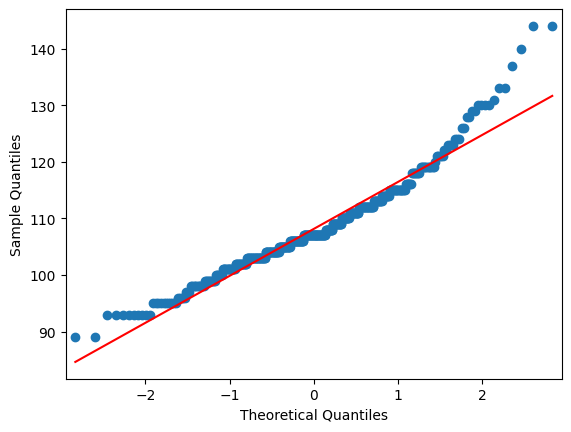

In [51]:
# 'Wheelbase' QQ plot
qqplot(Cars_df['Wheelbase'], line='s')
plt.show()

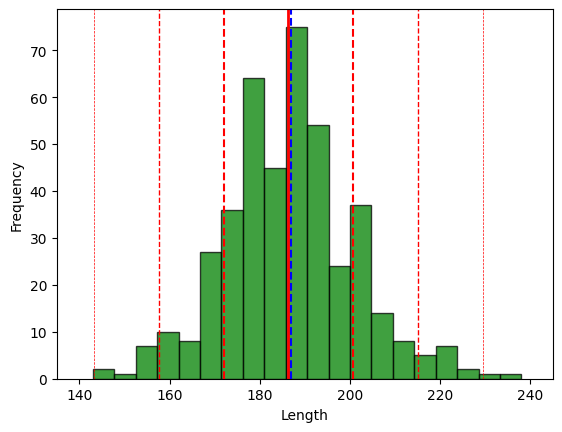

In [52]:
# Histogram for the 'Length' numerical variable.
plt.hist(Cars_df['Length'], bins = 20, alpha = 0.75, color = 'green', edgecolor = 'black')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.xlim(135, 245)

mean_value = Cars_df['Length'].mean()
median_value = Cars_df['Length'].median()
std_value = Cars_df['Length'].std()

plt.axvline(mean_value, color='red', linewidth=2, label=f'Mean: {mean_value: .2f}')
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=1.5, label=f'Median: {median_value: .2f}')
plt.axvline(mean_value+std_value, color='red', linestyle='dashed', linewidth=1.5, label=f'1 SD')
plt.axvline(mean_value-std_value, color='red', linestyle='dashed', linewidth=1.5)
plt.axvline(mean_value+2*std_value, color='red', linestyle='dashed', linewidth=1, label=f'2 SD')
plt.axvline(mean_value-2*std_value, color='red', linestyle='dashed', linewidth=1)
plt.axvline(mean_value+3*std_value, color='red', linestyle='dashed', linewidth=0.5, label=f'3 SD')
plt.axvline(mean_value-3*std_value, color='red', linestyle='dashed', linewidth=0.5)

plt.show()

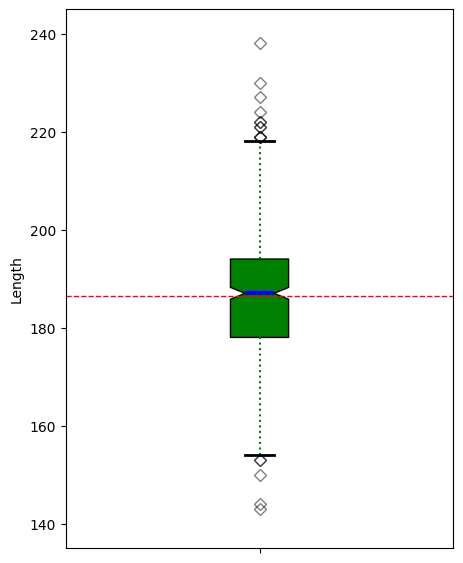

In [53]:
# Boxplot for the 'Length' numeric variable.
fig = plt.figure(figsize =(5, 7))
ax = fig.add_subplot(111)

# Creating axes instance.
bp = ax.boxplot(Cars_df['Length'], patch_artist = True,
                notch ='True')

for patch, color in zip(bp['boxes'], 'green'):
    patch.set_facecolor('green')

# Changing color and linewidth of whiskers.
for whisker in bp['whiskers']:
    whisker.set(color ='green',
                linewidth = 1.5,
                linestyle =":")

# Changing color and linewidth of caps.
for cap in bp['caps']:
    cap.set(color ='black',
            linewidth = 2)

# Changing color and linewidth of median.
for median in bp['medians']:
    median.set(color ='blue',
               linewidth = 3)
    
# Changing style of fliers.
for flier in bp['fliers']:
    flier.set(marker ='D',
              alpha = 0.5)
    
# Set axis labels.
ax.set_ylabel('Length')  
ax.set_xticklabels('') 

# Set axis limits.
ax.set_ylim(135,245) 

# Display the mean.
plt.axhline(mean_value, color='red', linewidth=1, linestyle='dashed', label=f'Mean: {mean_value: .2f}')

plt.show()

In [54]:
# 'Length' Anderson-Darling Normality Test
result = anderson(Cars_df['Length'])
print('Statistic: %.3f' % result.statistic)
p = 0
for i in range(len(result.critical_values)):
	sl, cv = result.significance_level[i], result.critical_values[i]
	if result.statistic < result.critical_values[i]:
		print('%.3f: %.3f, data looks normal (fail to reject H0)' % (sl, cv))
	else:
		print('%.3f: %.3f, data does not look normal (reject H0)' % (sl, cv))

Statistic: 1.286
15.000: 0.571, data does not look normal (reject H0)
10.000: 0.650, data does not look normal (reject H0)
5.000: 0.780, data does not look normal (reject H0)
2.500: 0.910, data does not look normal (reject H0)
1.000: 1.082, data does not look normal (reject H0)


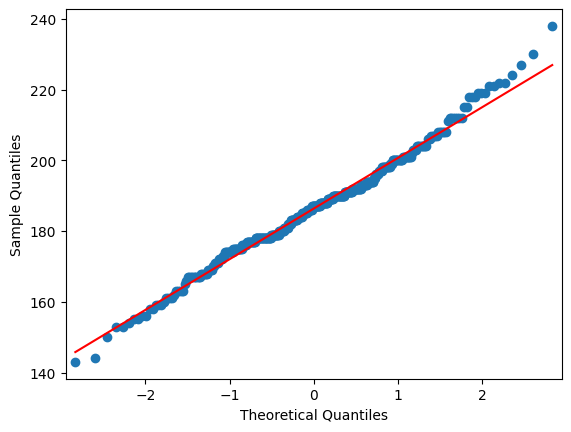

In [55]:
# 'Length' QQ plot
qqplot(Cars_df['Length'], line='s')
plt.show()

In [56]:
# Create data frame without object variables for correlation analysis.
Cars_corr=Cars_df[['MSRP','Invoice','EngineSize','Cylinders','Horsepower',
                    'MPG_City','MPG_Highway','Weight','Wheelbase','Length']]


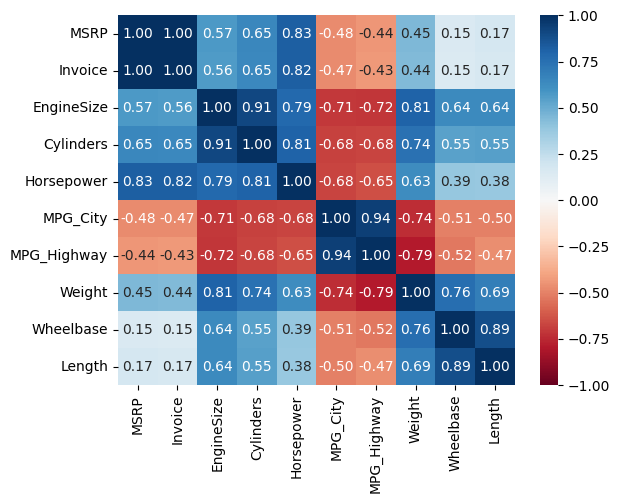

In [57]:
# Generate heatmap for correlation matrix analysis.
corr = Cars_corr.corr()
fig, ax = plt.subplots()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, vmin=-1, vmax=1, cmap="RdBu", ax=ax)
plt.show()

In [58]:
#Generate summary statistics for variables in correlation analysis.
summary_stats = Cars_corr.describe().map('{:,.3f}'.format)
summary_stats

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
count,428.000,428.000,428.000,426.000,428.000,428.000,428.000,428.000,428.000,428.000
mean,"32,774.855","30,014.701",3.197,5.808,215.886,20.061,26.843,"3,577.953",108.154,186.362
std,"19,431.717","17,642.118",1.109,1.558,71.836,5.238,5.741,758.983,8.312,14.358
min,"10,280.000","9,875.000",1.300,3.000,73.000,10.000,12.000,"1,850.000",89.000,143.000
25%,"20,334.250","18,866.000",2.375,4.000,165.000,17.000,24.000,"3,104.000",103.000,178.000
50%,"27,635.000","25,294.500",3.000,6.000,210.000,19.000,26.000,"3,474.500",107.000,187.000
75%,"39,205.000","35,710.250",3.900,6.000,255.000,21.250,29.000,"3,977.750",112.000,194.000
max,"192,465.000","173,560.000",8.300,12.000,500.000,60.000,66.000,"7,190.000",144.000,238.000


1.	Generate a scatter plot matrix of the following continuous variables: MSRP, Invoice, Horsepower, MPG Highway, and MPG City. Briefly explain the relationships that you see among the following variables. (20 points)

In [59]:
# Create data frame for assignment.
Cars_Q1=Cars_df[['MSRP','Invoice', 'Horsepower', 'MPG_City','MPG_Highway']]

# View some initial records.
Cars_Q1.head()

,MSRP,Invoice,Horsepower,MPG_City,MPG_Highway
0,36945.0,33337.0,265,17,23
1,23820.0,21761.0,200,24,31
2,26990.0,24647.0,200,22,29
3,33195.0,30299.0,270,20,28
4,43755.0,39014.0,225,18,24


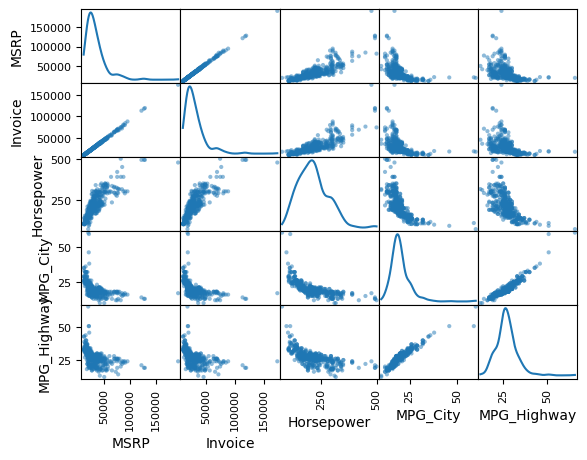

In [60]:
# Generate requested scatter plot matrix.
scatter_matrix(Cars_Q1, diagonal="kde")
plt.show()

Answer for 1: There is a clear positive linear relationship between MSRP and Invoice.  There is a notable positive linear relationship between MPG_City and MPG_Highway.  
There is an approximate positive linear relationship between Horsepower and MSRP/Invoice.  There is an approximate linear relationship between Horsepower and the 
negative of MPG_City and MPG_Highway.

2.  Use t-tests to accept or reject the statements listed below. State conclusions using the terminology of hypothesis testing: (40 pts)
    o	There is no difference in mileage between 'Front' drive and All-wheel drive. 
    o	There is no difference in engine size between vehicles from the USA versus vehicles from Asia. 
    o	There is no difference in the cost (MSRP or Invoice) between Wagon and Sedan vehicles.
    o	There is no difference in cost (MSRP or Invoice) between vehicles from the USA versus vehicles from Europe. 

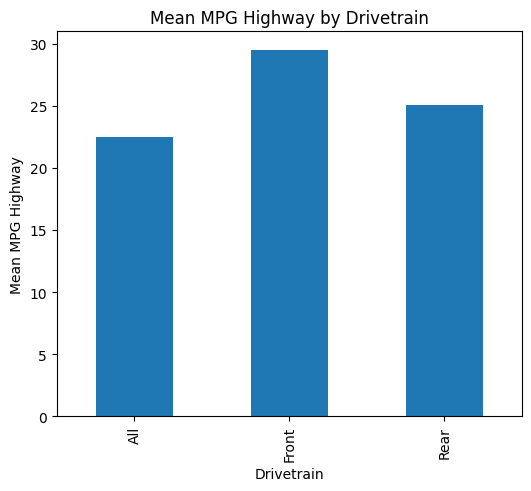

In [61]:
# Regarding there is no difference in mileage between 'Front' and 'All' wheel drive.
# Barchart for the 'DriveTrain' by mean 'MPG_Highway'.
dfg = Cars_df.groupby(['DriveTrain'])['MPG_Highway'].mean()
dfg.plot(kind='bar', title='Mean MPG Highway by Drivetrain', ylabel='Mean MPG Highway', xlabel='Drivetrain', figsize=(6,5))
plt.show()

In [62]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = Cars_df.groupby("DriveTrain").get_group("All")['MPG_Highway'].tolist()
 
class2_scores = Cars_df.groupby("DriveTrain").get_group("Front")['MPG_Highway'].tolist()

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: -10.450
P-value: 0.000


Answer for 2.1: Because the above p-value is less than the defined alpha 0f 0.05 (rejecting H0 the null hypothesis), and the t-statistic is sufficiently negative, 
we can say the mean highway MPG for front wheel drive (class 2) is higher with statistical significance than all wheel drive (class 1).

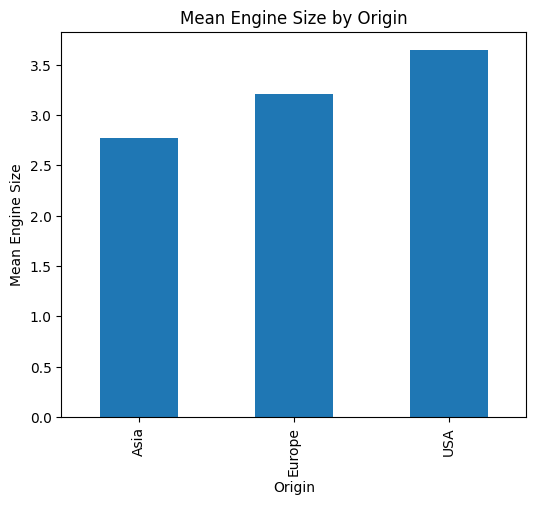

In [63]:
# Regarding there is no difference in engine size between vehicles from the USA versus vehicles from Asia.
# Barchart for the 'Origin' by mean 'EngineSize'.
dfg = Cars_df.groupby(['Origin'])['EngineSize'].mean()
dfg.plot(kind='bar', title='Mean Engine Size by Origin', ylabel='Mean Engine Size', xlabel='Origin', figsize=(6,5))
plt.show()

In [64]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = Cars_df.groupby("Origin").get_group("Asia")['EngineSize'].tolist()
 
class2_scores = Cars_df.groupby("Origin").get_group("USA")['EngineSize'].tolist()

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: -7.199
P-value: 0.000


Answer for 2.2: Because the above p-value is less than the defined alpha 0f 0.05 (rejecting H0 the null hypothesis), and the t-statistic is sufficiently negative, 
we can say the mean engine size for USA made cars (class 2) is larger with statistical significance than Asia made cars (class 1).

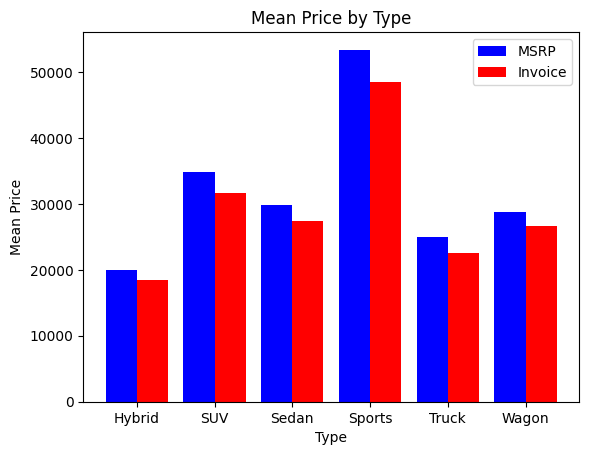

In [65]:
# Regarding there is no difference in the cost (MSRP or Invoice) between Wagon and Sedan vehicles.
# Multiple Barchart for the 'Type' by the mean 'MSRP' and 'Invoice'.
w = 0.4
x = ["Hybrid", "SUV", "Sedan", "Sports", "Truck", "Wagon"]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
dfg1 = Cars_df.groupby(['Type']) ['MSRP'].mean()
dfg2 = Cars_df.groupby(['Type']) ['Invoice'].mean()
plt.bar(bar1, dfg1, w, color='blue', label="MSRP")
plt.bar(bar2, dfg2, w, color='red', label="Invoice")
plt.xlabel("Type")
plt.ylabel("Mean Price")
plt.title("Mean Price by Type")
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

In [66]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = Cars_df.groupby("Type").get_group("Sedan")['MSRP'].tolist()
 
class2_scores = Cars_df.groupby("Type").get_group("Wagon")['MSRP'].tolist()

# Perform two-sample t-test
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: 0.317
P-value: 0.751


Answer for 2.3: Because the above p-value is greater than the defined alpha of 0.05 (accepting H0 the null hypothesis), and the absolute value of the t-statistic 
is small, we can say the difference of mean MSRP for sedans (class 1) and wagons (class 2) are not statistically significant.

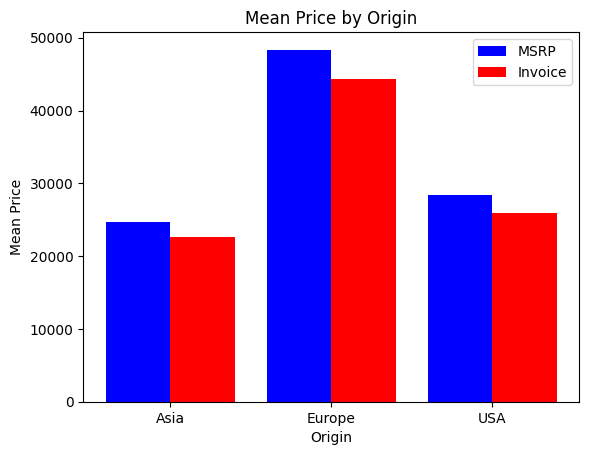

In [67]:
# Regarding there is no difference in cost (MSRP or Invoice) between vehicles from the USA versus vehicles from Europe.
# Multiple Barchart for the 'Origin' by the mean 'MSRP' and 'Invoice'.
w = 0.4
x = ["Asia", "Europe", "USA"]
bar1 = np.arange(len(x))
bar2 = [i+w for i in bar1]
dfg1 = Cars_df.groupby(['Origin']) ['MSRP'].mean()
dfg2 = Cars_df.groupby(['Origin']) ['Invoice'].mean()
plt.bar(bar1, dfg1, w, color='blue', label="MSRP")
plt.bar(bar2, dfg2, w, color='red', label="Invoice")
plt.xlabel("Origin")
plt.ylabel("Mean Price")
plt.title("Mean Price by Origin")
plt.xticks(bar1+w/2,x)
plt.legend()
plt.show()

In [68]:
# Running a Two-Tailed Two-Sample T-Test in Python

# Define two independent samples.
class1_scores = Cars_df.groupby("Origin").get_group("Europe")['MSRP'].tolist()
 
class2_scores = Cars_df.groupby("Origin").get_group("USA")['MSRP'].tolist()

# Perform two-sample t-test.
t_statistic, p_value = ttest_ind(class1_scores, class2_scores)

# Output the results.
print(f"t-statistic: {t_statistic:0,.3f}")
print(f"P-value: {p_value:0,.3f}")

t-statistic: 8.537
P-value: 0.000


Answer for 2.4: Because the above p-value is less than the defined alpha 0f 0.05 (rejecting H0 the null hypothesis), and the t-statistic is sufficiently positive,  
we can say the mean MSRP for Europe made cars (class 1) is higher with statistical significance than USA made cars (class 2).

3.  Provide estimates and standard errors for: (40 pts) 
    o	Mean MPG (City) for all Vehicles 
    o	Mean Horsepower for all Vehicles
    o	MPG (Highway) variance for vehicles in Asia  
    o	MSRP variance for vehicles from the USA

In [69]:
# 3.1 Mean MPG (City) for all Vehicles
mean = Cars_df['MPG_City'].mean()
std = Cars_df['MPG_City'].std()

# Output the results.
print(f"*Mean: {mean:0,.2f}")
print(f"Standard Deviation: {std:0,.2f}")

*Mean: 20.06
Standard Deviation: 5.24


In [70]:
# 3.2 Mean Horsepower for all Vehicles
mean = Cars_df['Horsepower'].mean()
std = Cars_df['Horsepower'].std()

# Output the results.
print(f"*Mean: {mean:0,.2f}")
print(f"Standard Deviation: {std:0,.2f}")

*Mean: 215.89
Standard Deviation: 71.84


In [71]:
# 3.3 MPG (Highway) variance for vehicles in Asia
mean = Cars_df.groupby("Origin").get_group("Asia")['MPG_Highway'].mean()
std = Cars_df.groupby("Origin").get_group("Asia")['MPG_Highway'].std()
var = Cars_df.groupby("Origin").get_group("Asia")['MPG_Highway'].var()

# Output the results.
print(f"Mean: {mean:0,.2f}")
print(f"Standard Deviation: {std:0,.2f}")
print(f"*Variance: {var:0,.2f}")

Mean: 28.27
Standard Deviation: 6.77
*Variance: 45.84


In [72]:
# 3.4 MSRP variance for vehicles from the USA
mean = Cars_df.groupby("Origin").get_group("USA")['MSRP'].mean()
std = Cars_df.groupby("Origin").get_group("USA")['MSRP'].std()
var = Cars_df.groupby("Origin").get_group("USA")['MSRP'].var()

# Output the results.
print(f"Mean: {mean:0,.2f}")
print(f"Standard Deviation: {std:0,.2f}")
print(f"*Variance: {var:0,.2f}")

Mean: 28,377.44
Standard Deviation: 11,711.98
*Variance: 137,170,534.22


4.  Apply regression analysis to predict the gas mileage using two models: (50 pts)
    o	A simple model using one continuous variable (input) of your choice. 
    o	A multiple regression model using three continuous variables of your choosing. Explain the tabular and graphical output that is produced. 


In [73]:
# Calculate the Total Sum of Squares (SST) for an empty model for MPG_Highway.
Y = Cars_df['MPG_Highway'].tolist()
Y_mean = np.mean(Y)
sst = np.sum((Y - Y_mean) ** 2)
print(f"SST = {sst:0,.3f}")

SST = 14,074.512


C:\Users\rcc_0\AppData\Local\Temp\ipykernel_12104\1212675252.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y = lm.params[0] + lm.params[1] * X


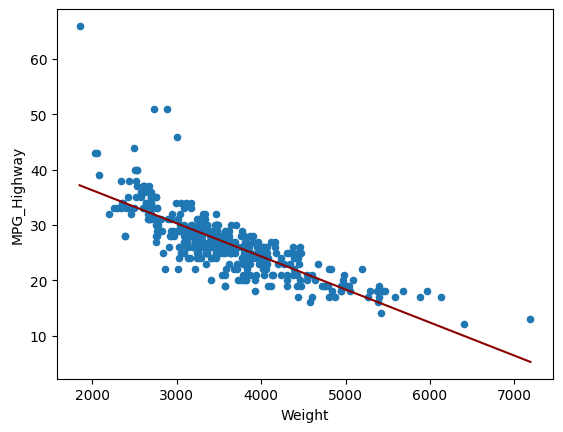

In [74]:
# 4.1 A simple model using one continuous variable (input) of your choice.
# Create requested simple model and scatterplot. Used MPG_Highway the outcome variable and Weight as the explanatory variable.
Cars_df.plot("Weight", "MPG_Highway", kind="scatter")
lm = smf.ols("MPG_Highway ~ Weight", data=Cars_df).fit()
xmin = Cars_df.Weight.min()
xmax = Cars_df.Weight.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta₀) & params[1] is the slope (beta₁)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X, Y, color="darkred")
plt.show()

In [75]:
# Generate OLS Regression results for the simple model.
print(lm.summary())
print('\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:            MPG_Highway   R-squared:                       0.626
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     712.0
Date:                Sun, 09 Feb 2025   Prob (F-statistic):           6.21e-93
Time:                        12:05:51   Log-Likelihood:                -1144.5
No. Observations:                 428   AIC:                             2293.
Df Residuals:                     426   BIC:                             2301.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     48.2515      0.820     58.836      0.0

4.1 Explain the tabular and graphical output that is produced. 
Of all of the numeric variables, excluding MPG_City, Weight had the highest absolute correlation (0.79) with MPG_Highway, so it made sense to choose it for the 
explanatory variable in the simple model.  In addition, neither variable passed normality tests, but MPG_Highway and Weight had a similarly right skewed distribution. 
Other than about five high 45-65 MPG_Highway values in the 2000-3000 Weight value range probably adding to the downward tilt in the regression line, the fitted 
regression line in the graphical output seems to reasonably traverse through the data.  

The R-squared value of 0.626 indicates that 62.6% of the variation in the predicted MPG_Highway values can be explained by Weight in this simple model.  The Y 
intercept, beta0, equals 48.2515 mpg at 0 lbs weight, and the regression line slope, beta1, equals -0.006 mpg per 1 lbs of weight.  The F-statistic of 712.0 easily 
exceeds any reasonable threshold.  The p-value is nearly zero and safely under the 0.05 alpha standard (rejecting H0 the null hypothesis), indicating clearly that 
the relationship between MPG_Highway and Weight is statistically significant.

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_12104\2570670381.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y = lm.params[0] + lm.params[1] * X


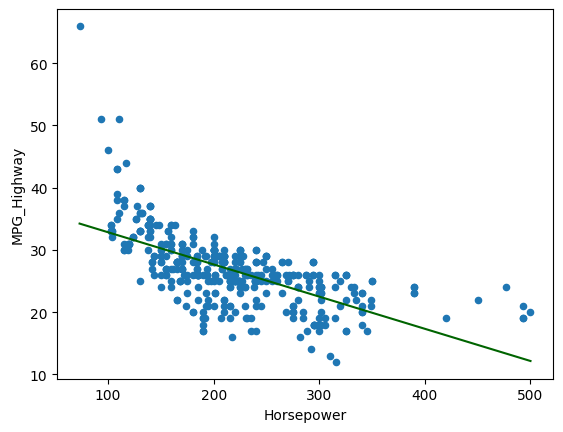

In [76]:
# 4.2 A multiple regression model using three continuous variables of your choosing. 

# Create preliminary a scatterplot with MPG_Highway to understand relationwhip of additional variables. 

# Use MPG_Highway the outcome variable and Horsepower as the explanatory variable.
Cars_df.plot("Horsepower", "MPG_Highway", kind="scatter")
lm = smf.ols("MPG_Highway ~ Horsepower", data=Cars_df).fit()
xmin = Cars_df.Horsepower.min()
xmax = Cars_df.Horsepower.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta₀) & params[1] is the slope (beta₁)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X, Y, color="darkgreen")
plt.show()

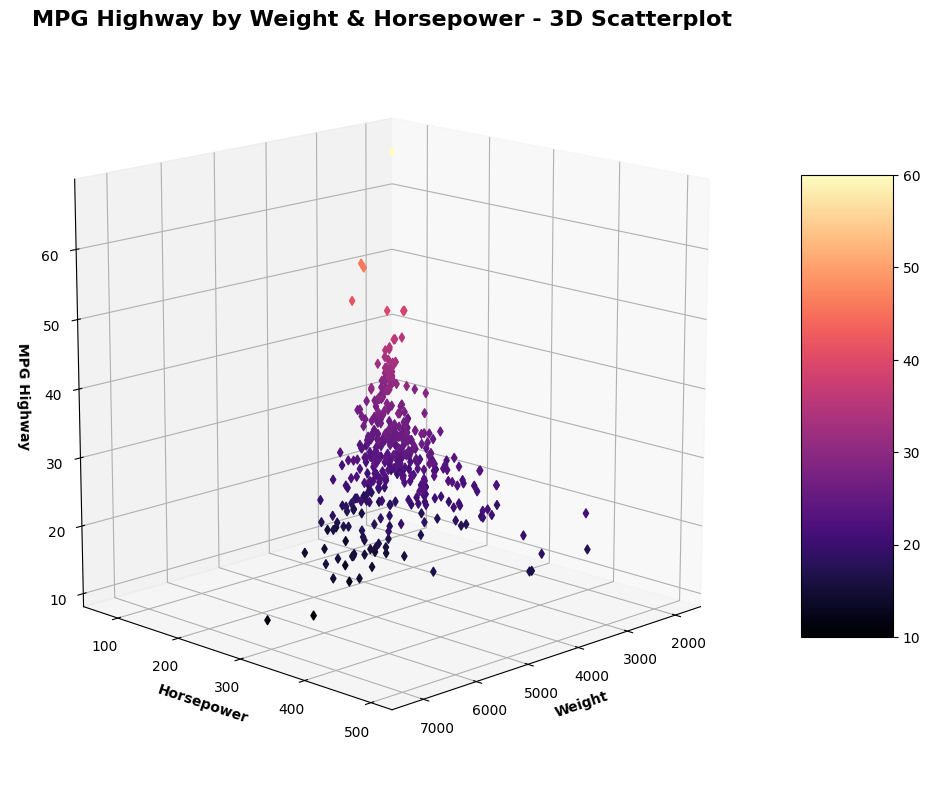

In [78]:
# Generate 3D plot of two significant explanatory variables and the outcome variable.
fig = plt.figure(figsize=(12,12))
ax = plt.axes(projection="3d")

x = Cars_df['Weight'].tolist()
y = Cars_df['Horsepower'].tolist()
z = Cars_df['MPG_Highway'].tolist()

my_cmap = plt.cm.magma
norm = mpl.colors.Normalize(vmin=10, vmax=60)

sctt = ax.scatter3D(x, y, z, c=z, alpha = 1, cmap=plt.cm.magma, marker = 'd')

ax.set_title('MPG Highway by Weight & Horsepower - 3D Scatterplot', fontweight='bold', fontsize=16)
ax.set_xlabel('Weight', fontweight='bold')
ax.set_ylabel("Horsepower", fontweight='bold')
ax.set_zlabel("MPG Highway", fontweight='bold')
ax.set_box_aspect(aspect = (1,1,1))
ax.view_init(elev=15, azim=45)

fig.colorbar(mpl.cm.ScalarMappable(norm = norm, cmap = my_cmap), ax = ax, shrink = 0.5, aspect = 5)

plt.show()

C:\Users\rcc_0\AppData\Local\Temp\ipykernel_12104\2536419347.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Y = lm.params[0] + lm.params[1] * X


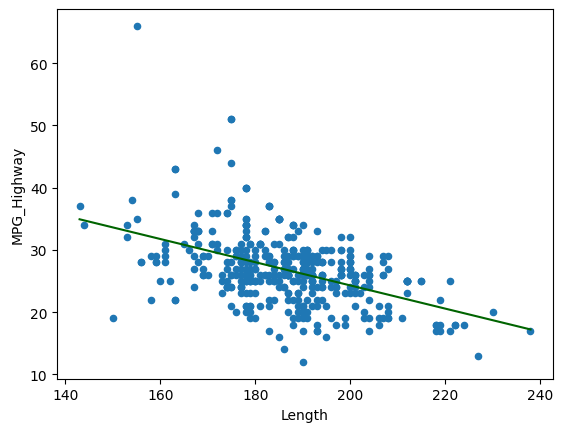

In [79]:
# Use MPG_Highway the outcome variable and Length as the explanatory variable.
Cars_df.plot("Length", "MPG_Highway", kind="scatter")
lm = smf.ols("MPG_Highway ~ Length", data=Cars_df).fit()
xmin = Cars_df.Length.min()
xmax = Cars_df.Length.max()
X = np.linspace(xmin, xmax, 100)
# params[0] is the intercept (beta₀) & params[1] is the slope (beta₁)
Y = lm.params[0] + lm.params[1] * X
plt.plot(X, Y, color="darkgreen")
plt.show()

In [80]:
# Generate an initial multiple linear regression model using determined variables.
lm = smf.ols(formula='MPG_Highway ~ Weight + Horsepower + Length', data=Cars_df).fit()
print(lm.params)

Intercept     41.141582
Weight        -0.005532
Horsepower    -0.018764
Length         0.051214
dtype: float64


In [81]:
# Generate OLS Regression results for the initial multiple linear regression model.
print(lm.summary())
print('\n', '='*20, '\n')
# Residual Sum of Squares
print(f"RSS = {lm.ssr:0,.3f}")
# Sum of Squares Error
print(f"SSE = {sst-lm.ssr:0,.3f}")

                            OLS Regression Results                            
Dep. Variable:            MPG_Highway   R-squared:                       0.671
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     287.8
Date:                Sun, 09 Feb 2025   Prob (F-statistic):          7.34e-102
Time:                        12:13:37   Log-Likelihood:                -1117.1
No. Observations:                 428   AIC:                             2242.
Df Residuals:                     424   BIC:                             2258.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     41.1416      2.294     17.933      0.0

4.2 Explain the tabular and graphical output that is produced. 
The decision to use the Weight variable as one of the required explanatory variables for the multiple linear regression model was an easy one after seeing the results
of its performance in the simple model for estimating MPG_Highway. Of the remaining numeric variables (excluding MPG_City, MSRP, and Invoice, due to their lack of 
causality), Horsepower had the lowest correlation (0.63) with Weight, and had an absolute correlation of 0.65 with MPG_Highway, so it made the sense to choose it for 
the second explanatory variable in the multiple linear regression model.  A scatter plot was developed to better visualize its relationship with the outcome variable 
MPG_Highway, it shared some similarities with the scatterplot for Weight and MPG_Highway.  Out of curiosity, I put together a 3D scatter plot using all three variables 
with colormapping focused on MPG_Highway. 

In addition, Horsepower failed normality tests, but shared a similarly right skewed distribution with MPG_Highway and Weight.  All three variables had an Anderson-
Darling statistic less than 5, but had a few notable outliers at the upper end of their distributions.  For the third explanatory variable needed, Length was chosen.
Length had the second lowest correlation (0.69) with Weight, had the lowest correlation (0.38) with Horsepower, but only had an absolute correlation of 0.47 with 
MPG_Highway.  Length failed the A-D normality test probably because of outliers clearly illustrated in its generated box plot, but had the best A-D statistic of 1.286 
of all of the numeric variables and the best looking QQ plot.  A scatter plot was developed to better visualize its relationship with the outcome variable MPG_Highway, 
and it shared general similarities with the scatterplot for Horsepower and MPG_Highway. 

After having determined the three required variables (Weight, Horsepower, Length), a OLS regression model was run with MPG_Highway as the outcome variable.  The R-squared 
value of 0.671 indicates that 67.1% of the variation in the predicted MPG_Highway values can be attributed to this multiple linear regression model.  The Y intercept, beta0, 
equals 41.1415 mpg at 0 lbs weight.  Weight, beta1, equals -0.0055 mpg per 1 lbs of weight, Horsepower, beta2, equals -0.0188 mpg per 1 lbs of weight, and Length, beta3,
equals 0.0512 mpg per 1 lbs of weight.  The F-statistic of 287.8 comfortably exceeds any reasonable threshold.  The p-value is nearly zero and safely under the 0.05 alpha 
standard (rejecting H0 the null hypothesis), indicating clearly that the relationship between MPG_Highway and the explanatory variables are statistically significant.

Experimented with other combinations of numeric variables, but my initial choice performed best.  With MPG_Highway having a SST of 14,714.512, the simple model using the 
Weight variable reduced it 8,805.921 to a SSR of 5,268.591, which amounts to an approximate 64.2% reduction.  The multiple linear regression model usiing Weight, Horsepower,
and Length variables reduced it 9,439.472 to a SSR of 4,635.039, which amounts to an approximate 68.5% reduction. Even though the explanatory values did not pass normality
tests for the most part, I did not endeavor to explore any transformations.  If the use MSRP and/or Invoice variable was appropriate as an explanatory variable, I would have 
definitely looked into performing a logrithmic transformation for them.  

Though the Length variable was statistically significant, it only improved the MLR model marginally.  Think binary conversions of the values of the categorical variable Type, 
and possibly Drivetrain, could have improved the MLR model, increasing the r-square and decreasing the SSR. Although, we were only limited to using three variables, and Type 
would essentailly create six and Drivetrain would create three.  If they were added, we would have to start paying close attention to the F-statistic to avoid overfitting of 
the model.